In [38]:
import numpy as np
import quantecon as qe
from quantecon import MarkovChain
import matplotlib.pyplot as plt
%matplotlib inline
from numba import jit
from scipy.optimize import brentq
import pandas as pd

In [30]:
β=.99         
σ=2        # risk aversion        # capital share
δ=0.025        # depreciation rate
θ=0.36        # capital share parameter
μ=0.34        # leisure weight in utility         # productivity parameter
nz=5         # number of points in productivity grids
nk=100        # number of points in k grid
η = 0.01      # productivity shock stdev
ρ = 0.9              

In [31]:
ls = (1-θ)/((1-μ)/μ + 1-θ - ((1-μ)/μ)*δ*θ/(1/β - (1-δ)))
ks = ls*(((1/β - (1-δ))/θ)**(1/(θ-1)))

In [32]:
kgrid = np.linspace(0.5*ks, 2*ks, nk)

In [33]:
mc = qe.markov.tauchen(ρ, η, 0, 3, nz)
zgrid = np.exp(mc.state_values)
Py = mc.P

In [34]:
###########################
#use this in the function that caculates labor supply
#It will need to be computed first in order to compute returns that come next
###########################

l = np.empty((nz,nk,nk))

for iz in range(nz):
    for ik in range(nk):
        for ikpr in range(nk):
            kz = (kgrid[ikpr]-(1-δ)*kgrid[ik])/(zgrid[iz]*(kgrid[ik])**θ)
            if kz >= 1:
                l[iz,ik,ikpr] = 1
            else:
                l[iz,ik,ikpr] = brentq(lambda x: (x**(1-θ))*((1-μ)/μ + 1-θ - (1-θ)/x) - ((1-μ)/μ)*kz,0.0000000001,1)

                

In [41]:
mc.state_values
#pd.DataFrame(mc.P)

array([-0.06882472, -0.03441236,  0.        ,  0.03441236,  0.06882472])

In [36]:
import pandas as pd

print(l[0])
pd.DataFrame(l[0])

[[2.87719708e-01 3.41527657e-01 4.01489057e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.41234923e-01 2.88527822e-01 3.41824942e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.01262733e-01 2.42402380e-01 2.89328953e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [3.55362698e-04 3.66063817e-04 3.77207096e-04 ... 3.50647178e-01
  3.87116580e-01 4.25869020e-01]
 [3.47979981e-04 3.58349639e-04 3.69143269e-04 ... 3.17089889e-01
  3.51211874e-01 3.87614142e-01]
 [3.40830188e-04 3.50882078e-04 3.61340683e-04 ... 2.85908804e-01
  3.17707419e-01 3.51775603e-01]]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.287720,0.341528,0.401489,0.467560,0.539650,0.617643,0.701401,0.790781,0.885636,0.985820,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.241235,0.288528,0.341825,0.401145,0.466444,0.537638,0.614610,0.697232,0.785362,0.878859,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.201263,0.242402,0.289329,0.342137,0.400843,0.465405,0.535742,0.611741,0.693278,0.780216,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.167244,0.202649,0.243549,0.290123,0.342462,0.400580,0.464438,0.533955,0.609024,0.689523,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.138589,0.168734,0.204008,0.244676,0.290911,0.342799,0.400354,0.463536,0.532268,0.606447,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000371,0.000382,0.000394,0.000407,0.000419,0.000433,0.000447,0.000462,0.000477,0.000493,...,0.201125,0.226238,0.253605,0.283261,0.315228,0.349515,0.386121,0.425036,0.466243,0.509720
96,0.000363,0.000374,0.000386,0.000398,0.000410,0.000423,0.000437,0.000451,0.000466,0.000481,...,0.178931,0.201845,0.226951,0.254300,0.283926,0.315850,0.350082,0.386619,0.425452,0.466565
97,0.000355,0.000366,0.000377,0.000389,0.000401,0.000414,0.000427,0.000440,0.000455,0.000470,...,0.158843,0.179645,0.202563,0.227662,0.254993,0.284589,0.316471,0.350647,0.387117,0.425869
98,0.000348,0.000358,0.000369,0.000380,0.000392,0.000404,0.000417,0.000430,0.000444,0.000459,...,0.140754,0.159541,0.180356,0.203278,0.228371,0.255683,0.285250,0.317090,0.351212,0.387614


In [7]:
# utility         
@jit(nopython=True)
def u(c,l,μ,σ):
    return ((c**μ)*((1-l)**(1-μ))**(1-σ))/(1-σ)
        

In [9]:
@jit(nopython=True)
def _compute_returns(kgrid,zgrid,l,θ,δ,σ,μ,Ret):
    # Compute the return given k and k'
    nk = len(kgrid)
    nz = len(zgrid)
    for iz in range(nz):
        for ik in range(nk):
            for ikpr in range(nk):
                lx = l[iz,ik,ikpr]
                if lx == 1:
                    Ret[iz,ik,ikpr] = -1e+14
                else:
                    c = zgrid[iz]*(kgrid[ik]**θ)*(lx**(1-θ))+(1-δ)*kgrid[ik]-kgrid[ikpr]
                    if c <= 0:
                        Ret[iz,ik,ikpr] = -1e+14
                    else: 
                        Ret[iz,ik,ikpr] = u(c,lx,μ,σ)
    return None


In [10]:
###########################
#use this in the function that generates returns
#Calls for a non-python functions (see below)
###########################


Ret = np.empty((nz,nk,nk))
_compute_returns(kgrid,zgrid,l,θ,δ,σ,μ,Ret)

In [12]:
@jit(nopython=True)
def _inner_loop(Ret,v,Ev,β):
    
    """
    This is a numba version of the inner loop of the solve in the
    Ramsey class. It updates v in place.
    """
    nz,nk = v.shape
    for iz in range(nz):
        for ik in range(nk):
            current_max = -1e14
            for ik_next in range(nk):
                m = Ret[iz,ik,ik_next] + β * Ev[iz,ik_next]
                if m > current_max:
                    current_max = m          
            v[iz,ik] = current_max          
    return None


In [13]:
##############################
#This will be used in the value function iteration loop
###############################

v = np.zeros((nz,nk))
Ev = Py @ v
_inner_loop(Ret,v,Ev,β)

In [14]:
###########################
#For computing distributions
#Notice that the function uses kgpr which is the policy (index function)
#that tells that given current z and k indexes which is the next index for k'
#Calls for two non-python functions (see below)
###########################


def endog_dist(self):
        self.g = np.zeros((self.nz*self.nk,self.nz*self.nk))
        self.prob = (1/(self.nz*self.nk))*np.ones((self.nz*self.nk))
        self.dist = np.zeros((self.nk))
        
        _state_t1(self.Py,self.kgpr,self.g)
        
        test = 1
        while test > 10**(-10):
            prob1 = self.prob @ self.g
            test = np.max(np.abs(prob1-self.prob))
            self.prob = prob1
        
        _state_t2(self.nz,self.nk,self.prob,self.dist)
        
        return (self.g,self.prob,self.dist)
        

In [15]:
########################
#State transition matrix
########################

@jit(nopython=True)
def _state_t1(Py, kgpr, g):
    
    nz,nk = kgpr.shape
    
    for iz in range(nz):
        for ik in range(nk):
            for izpr in range(nz):
                g[(iz-1)*nk + ik, (izpr-1)*nk + kgpr[iz,ik]] = Py[iz,izpr]
                
    return None
                
#########################
#Distribution of capital
#########################    
@jit(nopython=True)
def _state_t2(nz,nk,prob,dist):
    
    for iz in range(nz):
        for ik in range(nk):
            dist[ik] = dist[ik] + prob[(iz-1)*nk + ik]

    return None

NameError: name 'ramsey' is not defined

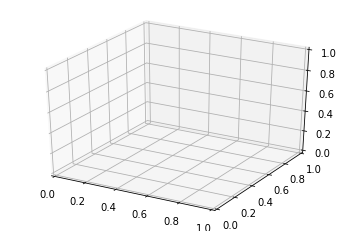

In [19]:

########################
#3D plots after you have run the main routine for solving and obtaining policy functions
#ramsey is the Class name that I gave to the code: so once it is run, calling any variable within the class requires
#ramsey.var -- see for example we call ramsey.nk,ramsey.nz. These to variables are set by the modeller, but then
# ramsey.gdp is what has been calculated...notice that all policy functions are functions of z and k and therefore
# they are surfaces
########################

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
xx, yy = kgrid, zgrid 
X, Y = np.meshgrid(xx, yy)
Z = ramsey.gdp

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()


